# Primera parte: Introducción a las redes neuronales con Keras

En esta primera parte, vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados** (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [ ]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

import matplotlib.pyplot as plt

Primero, vamos a obtener los datos. Por suerte para nosotros, estos pueden ser descargados directamente desde Keras, por lo que no tendremos que preocuparnos de tratar con ficheros.

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Acto seguido, normalizamos esos datos de manera similar a como hemos visto con MNIST, obteniendo valores entre 0 y 1. Este paso es muy importante para el correcto funcionamiento de nuestra red.

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [ ]:
### Tu código aquí ###
print("numero de imagenes de entrenamiento: {}".format(x_train.shape[0]))
print("núúmero de imagenes de test: {}" .format(x_test.shape[0]))
print("tamaño de las imagenes: {} x {}".format(x_train.shape[1],x_train.shape[2]))

numero de imagenes de entrenamiento: 60000
núúmero de imagenes de test: 10000
tamaño de las imagenes: 28 x 28


*Tu respuesta aquí*

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [ ]:
### Tu código aquí ###
print("tipo de informacion en y: {}".format(y_train.dtype))
#Nombramos las distintas clases
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

tipo de informacion en y: uint8


'Ankle boot'

*Tu respuesta aquí*


Vamos a **visualizar** una imagen de ejemplo. Prueba tu mismo a cambiar la imagen en uso para explorar el dataset visualmente ejecutando el siguiente código:

In [ ]:
def visualize_example(x):
    plt.figure()
    plt.imshow(x)
    plt.colorbar()
    plt.grid(False)
    plt.show()

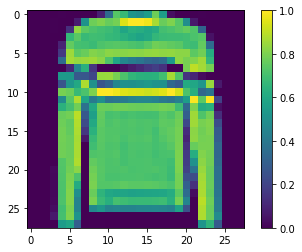

In [ ]:
visualize_example(x_train[5])

## 2. Entrenamiento de una red neuronal simple

**Pregunta 2 *(3.5 puntos)***. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Dos hidden layers de tamaños 128 y 64, utilizando unidades **sigmoid**
* Optimizador **sgd**.
* Durante el entrenamiento, la red tiene que mostrar resultados de **loss** y **accuracy** por cada epoch.
* La red debe entrenar durante **20 epochs** y batch size de **64**.
* La última capa debe de ser una capa **softmax**.

Tu red tendría que ser capaz de superar fácilmente 60% de accuracy.

In [ ]:
### Tu código aquí ###
#Construimos la red utilizando una hidden layer de 128 y otra de 64, utilizando sigmoid
model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(128, activation="sigmoid"))
model.add(keras.layers.Dense(64, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))
#Compilamos el modelo con optimizador sgd 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics =["accuracy"])


In [ ]:
#Entrenamos la red neuroan con 20 epochs y mostramos los resultados de loss y accuracy por cada epoch
history = model.fit(x_train, y_train, batch_size=64, epochs=20)

Epoch 1/20
938/938 [==============================] - 2s 3ms/step - loss: 2.2008 - accuracy: 0.4049
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 1.8395 - accuracy: 0.5793
Epoch 3/20
938/938 [==============================] - 2s 3ms/step - loss: 1.4480 - accuracy: 0.6174
Epoch 4/20
938/938 [==============================] - 2s 3ms/step - loss: 1.2101 - accuracy: 0.6522
Epoch 5/20
938/938 [==============================] - 2s 3ms/step - loss: 1.0629 - accuracy: 0.6783
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.9610 - accuracy: 0.6967
Epoch 7/20
938/938 [==============================] - 2s 3ms/step - loss: 0.8852 - accuracy: 0.7105
Epoch 8/20
938/938 [==============================] - 2s 3ms/step - loss: 0.8266 - accuracy: 0.7222
Epoch 9/20
938/938 [==============================] - 2s 2ms/step - loss: 0.7808 - accuracy: 0.7307
Epoch 10/20
938/938 [==============================] - 2s 2ms/step - loss: 0.7444 - accuracy: 0.7398

## 3. Evaluación del modelo en datos de test

Una vez hemos entrenado nuestro modelo, vamos a evaluarlo en los datos de test de Fashion MNIST.

**Pregunta 3.1 *(0.5 puntos)***. Utilizando el modelo recién entrenado, obtener la accuracy resultante en el dataset de test.

In [ ]:
### Tu código aquí ###
#comprobamos el accuracy de la red, con un resultado en torno a el 79% 
#y una perdida del 57%
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.5934 - accuracy: 0.7799

Test accuracy: 0.7799000144004822


**Pregunta 3.2 *(0.5 puntos)***. Utilizando el método **predict** de Keras, realizar predicciones para los datos de test. Por cada predicción resultante, ¿qué significan los números que obtenemos al hacer predict? ¿Cómo podemos obtener el valor de la clase resultante? (recordar que estamos utilizando una capa softmax para clasificar).

In [ ]:
### Tu código aquí ###
#utilizamos el metodo preidct de keras
predictions = model.predict(x_test)
#Obtenemos la predicción sobre el elemento 0 de nuestros datos de test
#vemos que obtenemos un valor de predicción sobre cada una de las categorias 
#que tenemos en y_test. La posición con mayor valor de predicción será 
#aquella que tendrá el valor de confianza más alto
print("Array de valores y confianza en cada uno de ellos:\n {}".format(predictions[0]))
#Podemos comprobar si es correcto viendo que etiqueta tiene esa imagen en nuestro dataset
print("Valor del primer objeto de test: {}".format(y_test[0]))
#En este caso en el array podemos ver que la ultima posicion se corresponde con aquella de mayor
#confianza, que coincide con el valor del primer objeto de test
class_names[y_train[0]]

Array de valores y confianza en cada uno de ellos:
 [6.7958434e-05 1.4069314e-04 2.1289969e-04 2.8525051e-04 1.5270742e-04
 1.7307419e-01 2.0518480e-04 3.2865551e-01 1.3860133e-02 4.8334551e-01]
Valor del primer objeto de test: 9


'Ankle boot'

*Tu respuesta aquí*

Se ha ido respondiendo en los comentarios mientras se hacia el codigo.

En resumen, la red neuronal obtiene un accuracy en torno al 79% y al realizar una prueba de predicción vemos que la realiza correctamente